<a href="https://colab.research.google.com/github/Ximenaloranca/Investigaci-n-de-operaciones/blob/main/Inventario_con_descuento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inventario con descuento**

In [106]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

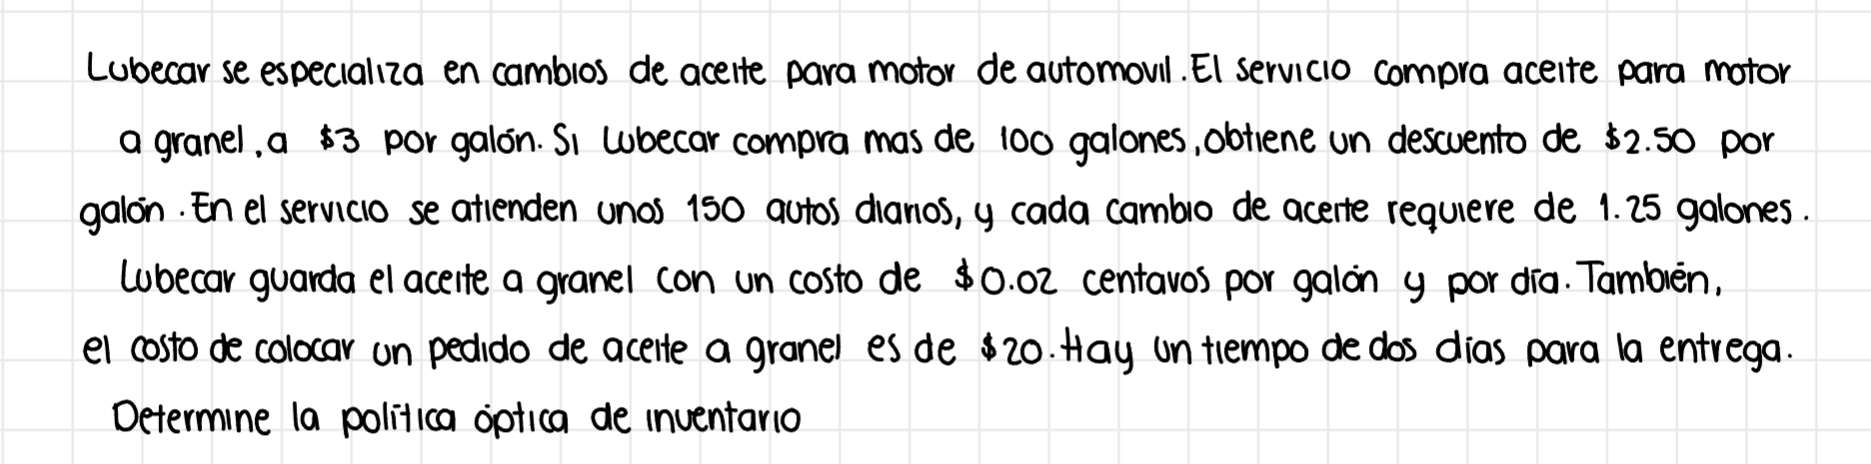

In [107]:
# Definimos los simbolos y funciones
c1, c2, d, h, K, L, Q, Qop, t1=sp.symbols("c1, c2, d, h, K, L, Q, Qop, t1")
T=sp.Function("T")
Qo=sp.Function("Qo")

In [108]:
c1=3
c2=2.5
d=187.5
h=0.02
K=20
L=2
q=1000
#Qop=612.3724

Paso 1. Calcular Q óptimo

In [109]:
def Qop(K,d,h):
    return np.sqrt((2*K*d)/h)

In [110]:
Qo=Qop(K,d,h)

In [111]:
Qo

np.float64(612.3724356957945)

Paso 2. Determinar la zona en que se encuentra q

In [112]:
def T(Q):
    if Q <= q:
        f=c1*d+K*d/Q+h*Q/2
    else:
        f=c2*d+K*d/Q+h*Q/2
    return f

In [113]:
eq=sp.Eq(Q**2 + (2/h)*(c2*d-T(Qo))*Q+2*K*d/h,0)

In [114]:
eq

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

In [115]:
sol=sp.solve(eq,Q)

In [116]:
sol

[35.4970848447485, 10564.2477865469]

In [117]:
s=sol[1] #Aquí debemos seleccionar la solución que sea mayor que q

In [118]:
s

10564.2477865469

Ejercicio 1: Escriba una función que calcula la Q óptima. Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

In [119]:
import numpy as np

def calcular_Q_optima(K, d, h, c1, c2, q_break):
    """
    Calcula la Q óptima comparando los costos totales en las diferentes zonas.
    """
    # Calculamos el EOQ básico (Q económica sin descuento)
    Q_eoq = np.sqrt((2 * K * d) / h)

    # Función auxiliar para costo total: Costo Compra + Costo Pedir + Costo Mantener
    def costo_total(Q, precio):
        return (precio * d) + (K * d) / Q + (h * Q) / 2

    # Si el EOQ natural ya cae en la zona de descuento, ya es la respuesta
    if Q_eoq >= q_break:
        return Q_eoq, "Zona II (Descuento)"

    # Si el EOQ es menor que q, debemos comparar costos
    else:
        costo_sin_descuento = costo_total(Q_eoq, c1)
        costo_con_descuento = costo_total(q_break, c2)

        # Si comprar 1000 (con descuento) es más barato que el EOQ (sin descuento)
        if costo_con_descuento < costo_sin_descuento:
            return q_break, "Zona II (Descuento forzado)"
        else:
            return Q_eoq, "Zona I (Sin descuento)"

# c1=3, c2=2.5, d=187.5, h=0.02, K=20, q=1000
Q_res, region = calcular_Q_optima(20, 187.5, 0.02, 3, 2.5, 1000)
print(f"Q Óptima: {Q_res}")
print(f"Región: {region}")

Q Óptima: 1000
Región: Zona II (Descuento forzado)


Para calcular el tiempo de retraso efectivo

In [120]:
t1=Qo/d
np.floor(L/t1)

np.float64(0.0)

Por tanto la política del inventario debe ser:

In [121]:
print("Pedir", q, "cuando el inventario caiga a:", L*d)

Pedir 1000 cuando el inventario caiga a: 375.0


Ejercicio 2: Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.

In [122]:
def obtener_politica_inventario(K, d, h, c1, c2, q_break, L):
    # Llamamos a la función del ejercicio anterior para obtener Q
    Q_opt, _ = calcular_Q_optima(K, d, h, c1, c2, q_break)

    # Calculamos el Punto de Reorden (ROP)
    # ROP = Demanda diaria * Tiempo de entrega
    punto_reorden = d * L

    return f"Pedir {Q_opt} cuando el inventario caiga a {punto_reorden}"

# Usamos las variables definidas al inicio
print(obtener_politica_inventario(K, d, h, c1, c2, q, L))

Pedir 1000 cuando el inventario caiga a 375.0


Para graficar

In [123]:
def T(Q, c1, c2, h, K, d, q):
    Q = np.array(Q)

    c = np.where(Q <= q, c1, c2)   # opciones

    return c*d + (K*d)/Q + (h*Q)/2

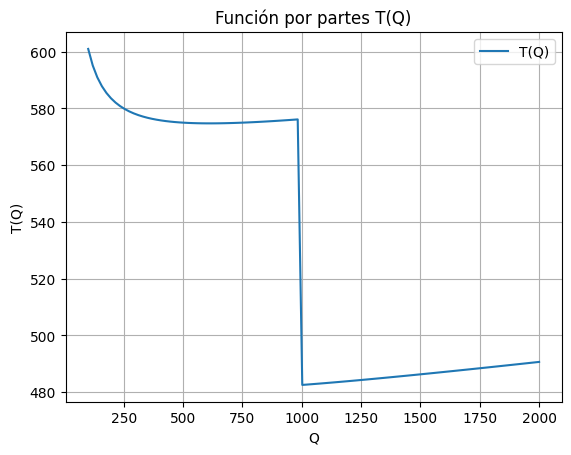

In [124]:
Q_vals = np.linspace(100, 2000, 100)

T_vals = T(Q_vals, c1, c2, h, K, d, q)

plt.plot(Q_vals, T_vals, label="T(Q)")
#plt.axvline(q, color='red', linestyle='--', label="q")  # marca el punto de quiebre

plt.xlabel("Q")
plt.ylabel("T(Q)")
plt.title("Función por partes T(Q)")
plt.legend()
plt.grid(True)
plt.show()